#### 4Ws Framework (Problem Framing)
Who

Internet users (students, professionals, senior citizens)

Online banking and UPI users

E-commerce and social media users

What

Users are exposed to phishing links, fake emails, scam calls, and fraudulent websites

Lack of real-time detection and awareness mechanisms

Where

Emails

SMS

Social media platforms

Online banking portals

E-commerce websites

Why

No intelligent system to detect fraud patterns in real time

Low cyber awareness

Increasing sophistication of online fraud techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
np.random.seed(42)

n_samples = 1000

data = {
    "user_id": np.arange(1, n_samples + 1),
    "age": np.random.randint(18, 70, n_samples),
    "transaction_amount": np.random.uniform(50, 50000, n_samples),
    "login_attempts": np.random.randint(1, 10, n_samples),
    "device_type": np.random.choice(["Mobile", "Laptop", "Tablet", None], n_samples),
    "location_change": np.random.choice([0, 1], n_samples),
    "clicked_suspicious_link": np.random.choice([0, 1, None], n_samples),
    "account_age_days": np.random.randint(10, 3000, n_samples),
    "fraud": np.random.choice([0, 1], n_samples, p=[0.85, 0.15])
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()


,user_id,age,transaction_amount,login_attempts,device_type,location_change,clicked_suspicious_link,account_age_days,fraud
0,1,56,26654.232459,3,Mobile,0,None,1882,0
1,2,69,12161.401657,8,Tablet,1,None,715,0
2,3,46,13498.699386,6,Mobile,1,None,861,0
3,4,32,18895.343947,5,Laptop,0,0,17,0
4,5,60,1052.556329,4,Tablet,1,None,2086,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  1000 non-null   int64  
 1   age                      1000 non-null   int32  
 2   transaction_amount       1000 non-null   float64
 3   login_attempts           1000 non-null   int32  
 4   device_type              747 non-null    object 
 5   location_change          1000 non-null   int64  
 6   clicked_suspicious_link  652 non-null    object 
 7   account_age_days         1000 non-null   int32  
 8   fraud                    1000 non-null   int64  
dtypes: float64(1), int32(3), int64(3), object(2)
memory usage: 58.7+ KB


In [6]:
df.isnull().sum()


user_id                      0
age                          0
transaction_amount           0
login_attempts               0
device_type                253
location_change              0
clicked_suspicious_link    348
account_age_days             0
fraud                        0
dtype: int64

In [7]:
df.describe()


,user_id,age,transaction_amount,login_attempts,location_change,account_age_days,fraud
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,43.81900,24934.869081,4.980000,0.494000,1502.24300,0.151000
std,288.819436,14.99103,14471.812869,2.542059,0.500214,838.42827,0.358228
min,1.000000,18.00000,281.369549,1.000000,0.000000,11.00000,0.000000
25%,250.750000,31.00000,11895.029791,3.000000,0.000000,785.25000,0.000000
50%,500.500000,44.00000,25240.011498,5.000000,0.000000,1516.50000,0.000000
75%,750.250000,56.00000,36919.968856,7.000000,1.000000,2198.25000,0.000000
max,1000.000000,69.00000,49970.715602,9.000000,1.000000,2997.00000,1.000000


In [8]:
# Handling missing values by filling categorical missing values

# Fill categorical missing values
df["device_type"].fillna(df["device_type"].mode()[0], inplace=True)

# Fill binary missing values with mode
df["clicked_suspicious_link"].fillna(df["clicked_suspicious_link"].mode()[0], inplace=True)


C:\Users\Deepanshu Saini\AppData\Local\Temp\ipykernel_21064\2430694637.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["device_type"].fillna(df["device_type"].mode()[0], inplace=True)
C:\Users\Deepanshu Saini\AppData\Local\Temp\ipykernel_21064\2430694637.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
Q1 = df["transaction_amount"].quantile(0.25)
Q3 = df["transaction_amount"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["transaction_amount"] >= lower) & (df["transaction_amount"] <= upper)]


In [ ]:
# validation of data types
df["clicked_suspicious_link"] = df["clicked_suspicious_link"].astype(int)
df["location_change"] = df["location_change"].astype(int)
df["fraud"] = df["fraud"].astype(int)


In [12]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  1000 non-null   int64  
 1   age                      1000 non-null   int32  
 2   transaction_amount       1000 non-null   float64
 3   login_attempts           1000 non-null   int32  
 4   device_type              1000 non-null   object 
 5   location_change          1000 non-null   int64  
 6   clicked_suspicious_link  1000 non-null   int64  
 7   account_age_days         1000 non-null   int32  
 8   fraud                    1000 non-null   int64  
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 58.7+ KB


user_id                    0
age                        0
transaction_amount         0
login_attempts             0
device_type                0
location_change            0
clicked_suspicious_link    0
account_age_days           0
fraud                      0
dtype: int64

In [13]:
df["fraud"].value_counts()


fraud
0    849
1    151
Name: count, dtype: int64

In [14]:
df["fraud"].value_counts(normalize=True) * 100


fraud
0    84.9
1    15.1
Name: proportion, dtype: float64

In [15]:
df.groupby("fraud")["transaction_amount"].mean()


fraud
0    25007.181011
1    24528.294057
Name: transaction_amount, dtype: float64

In [16]:
pd.crosstab(df["clicked_suspicious_link"], df["fraud"])


fraud,0,1
clicked_suspicious_link,,
0,262,57
1,587,94


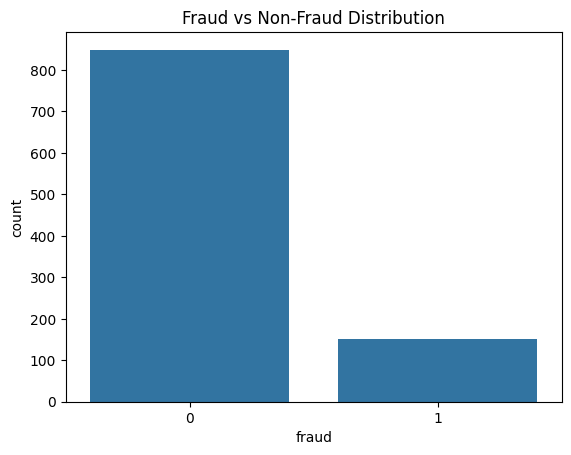

In [17]:
sns.countplot(x="fraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


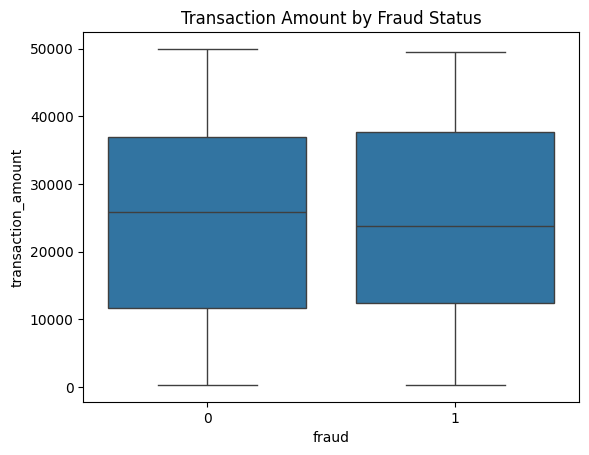

In [18]:
sns.boxplot(x="fraud", y="transaction_amount", data=df)
plt.title("Transaction Amount by Fraud Status")
plt.show()


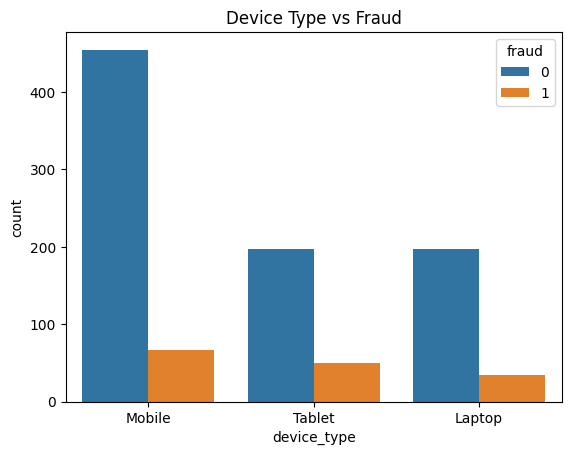

In [19]:
sns.countplot(x="device_type", hue="fraud", data=df)
plt.title("Device Type vs Fraud")
plt.show()


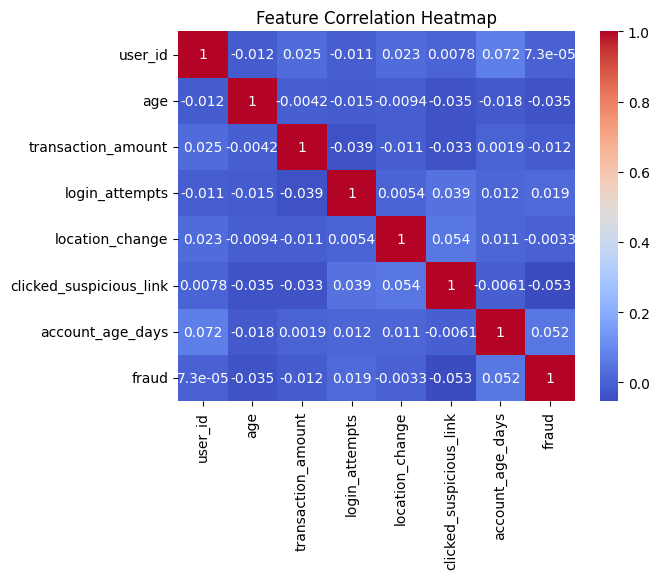

In [ ]:
plt.figure()
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [23]:
df.head()


,user_id,age,transaction_amount,login_attempts,device_type,location_change,clicked_suspicious_link,account_age_days,fraud
0,1,56,26654.232459,3,Mobile,0,1,1882,0
1,2,69,12161.401657,8,Tablet,1,1,715,0
2,3,46,13498.699386,6,Mobile,1,1,861,0
3,4,32,18895.343947,5,Laptop,0,0,17,0
4,5,60,1052.556329,4,Tablet,1,1,2086,0
